In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

/miniconda3/envs/rbcenv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read data
proteomics = pd.read_excel('../data/Proteomics.xlsx')
proteomics.set_index('Ensembl Gene ID', inplace=True) # Ensembl Gene ID
meta = pd.read_excel('../data/meta_proteomics.xlsx')

In [3]:
#15 samples out of all should be non NA for each protein
proteomics = proteomics.dropna(thresh=15, axis=0)
# set rest of NA values 0
proteomics = proteomics.fillna(0)

In [4]:
normalized_proteomics = (proteomics - proteomics.mean())/proteomics.std()

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_proteomics.transpose())
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df = pd.concat([principalDf, meta], axis = 1)

In [6]:
#The percentage of the explained variance by component 1
pca.fit(normalized_proteomics.transpose()).explained_variance_ratio_[0]*100

69.53314321647936

In [7]:
#The percentage of the explained variance by component 2
pca.fit(normalized_proteomics.transpose()).explained_variance_ratio_[1]*100

15.870313277517573

In [8]:
#The percentage of the explained variance by 2 components
pca.fit(normalized_proteomics.transpose()).explained_variance_ratio_[0]*100 + pca.fit(normalized_proteomics.transpose()).explained_variance_ratio_[1]*100

85.40345649399696

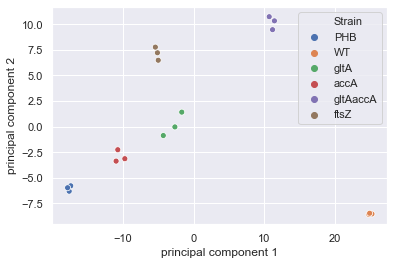

In [9]:
plot = sns.scatterplot(x="principal component 1", y="principal component 2", data=pca_df,hue='Strain')
plot.figure.savefig("../figures/proteomics_pca.svg")